In [1]:
%matplotlib inline
import sympy 
import scipy.signal 
import numpy as np
import matplotlib.pyplot as plt 


Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Butterwortha   
    - rząd filtru n (dla n od 1 do 5)  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)


Attenuation per octave for 1 - th order filter is: 5.988230
Attenuation per octave for 2 - th order filter is: 12.040793
Attenuation per octave for 3 - th order filter is: 18.061795
Attenuation per octave for 4 - th order filter is: 24.082400
Attenuation per octave for 5 - th order filter is: 30.103000


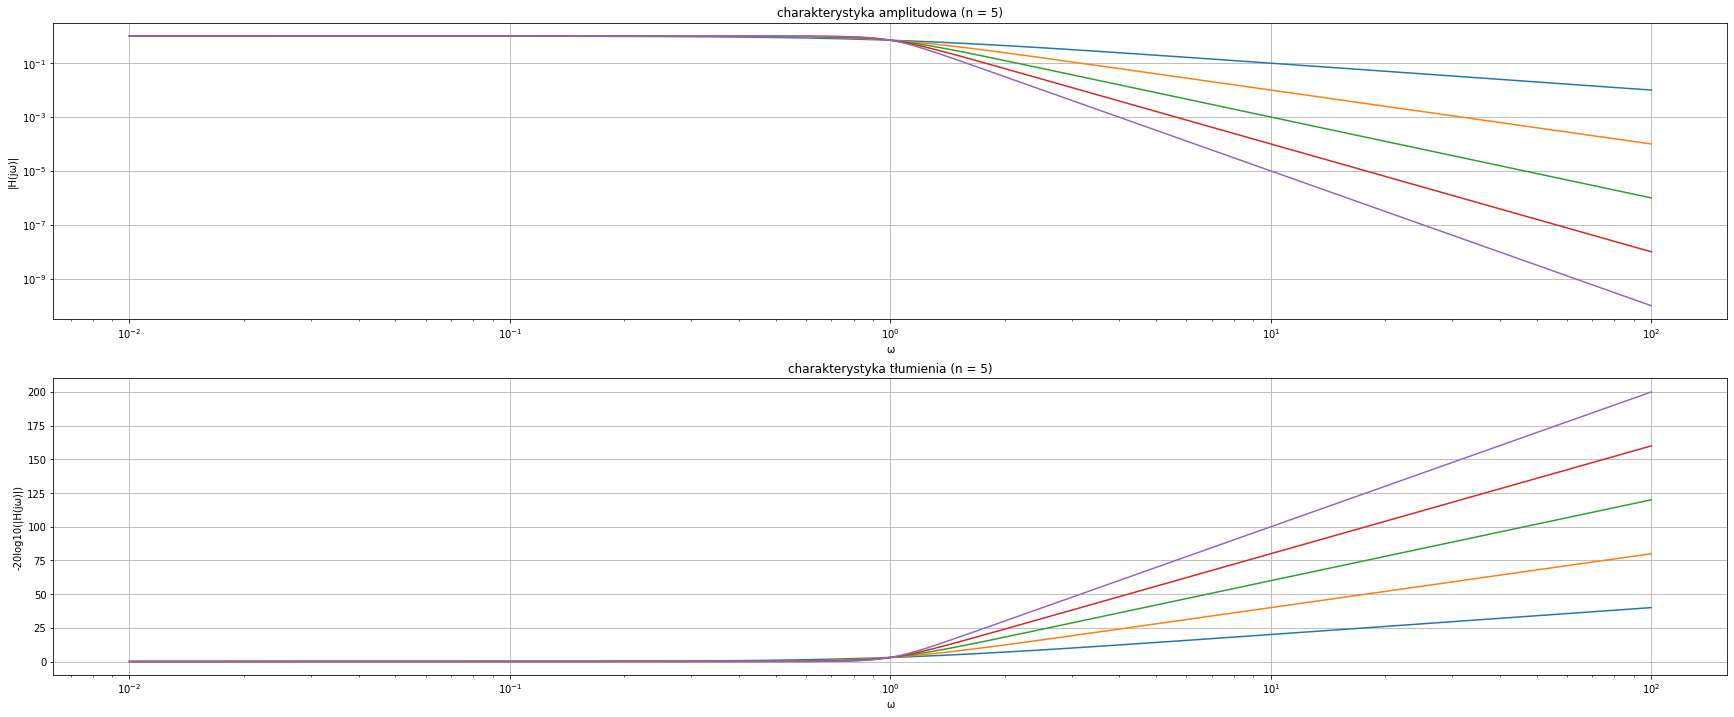

In [5]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)

for i in range(1,n+1):    
    #design filter
    B, A = scipy.signal.butter(N = i, Wn = wp, btype= 'low', analog=True, output = 'ba')
    #calculate transmitance samples and magnitude characteristic
    H = scipy.signal.freqs(B, A, w)[1]
    M = np.abs(H)
    #calculate Attenuation 
    L = -20*np.log10(M)
    #calculate attenuation per octave
    w_oct = np.array([0+10j, 0+20j])
    H_oct = np.polyval(B, w_oct) / np.polyval(A, w_oct)
    L_oct = -20*np.log10(np.abs(H_oct))
    print('Attenuation per octave for %d - th order filter is: %f'%(i, L_oct[1]-L_oct[0]))

    #display magnitude characteristic
    axs[0].loglog(w,M)
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[1].semilogx(w,L)
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()



Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Czebyszewa I rodzaju   
    - rząd filtru n (dla n od 1 do 5)  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)


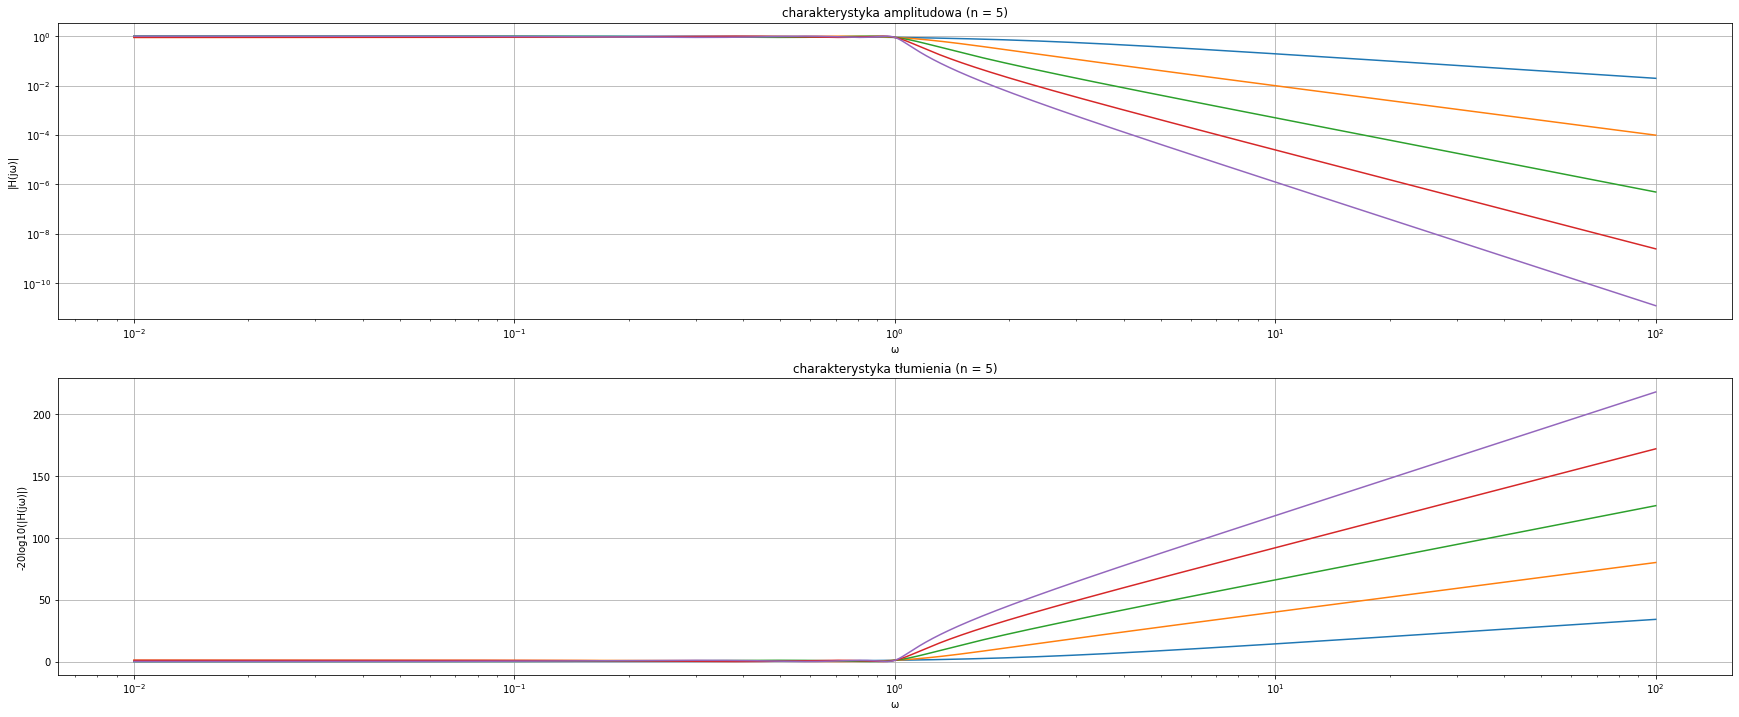

In [6]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)

for i in range(1,n+1):    
    #design filter
    B, A = scipy.signal.cheby1(N = i, rp=1, Wn = wp, btype= 'low', analog=True, output = 'ba')
    #calculate transmitance samples and magnitude characteristic
    H = scipy.signal.freqs(B, A, w)[1]
    M = np.abs(H)
    #calculate Attenuation 
    L = -20*np.log10(M)
    #calculate attenuation per octave
    
    #display magnitude characteristic
    axs[0].loglog(w,M)
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[1].semilogx(w,L)
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()

 
Porównać charakterystyki amplitudowe i fazowe dla aproksymacji Butterwortha i Czebyszewa I rodzaju:
    - rząd filtru n = 5  
    - pulsacja graniczna ω=1 rad/s  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie)  
    - wykreślić charakterystyki fazowe (na jednym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

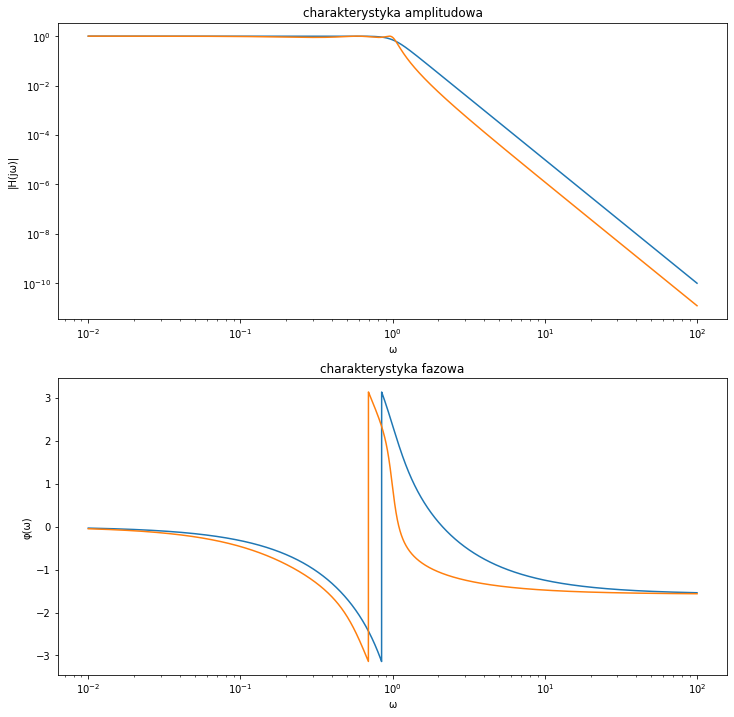

In [7]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[12,12])    
#log w vector
w = np.logspace(-2,2,10000)

#Butterworth
#design filter
B, A = scipy.signal.butter(N = i, Wn = wp, btype= 'low', analog=True, output = 'ba')
#calculate transmitance samples and magnitude characteristic
H = scipy.signal.freqs(B, A, w)[1]
M = np.abs(H)
#calculate phase 
P = np.angle(H)
#display magnitude characteristic
axs[0].loglog(w,M)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w,P)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

#cheby
#design filter
B, A = scipy.signal.cheby1(N = i, rp=1, Wn = wp, btype= 'low', analog=True, output = 'ba')
#calculate transmitance samples and magnitude characteristic
H = scipy.signal.freqs(B, A, w)[1]
M = np.abs(H)
#calculate phase 
P = np.angle(H)
#display magnitude characteristic
axs[0].loglog(w,M) 
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w,P)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

Wyznaczanie minimalnego wymaganego rzędu filtru:  
 ### gabaryty: 
 - a)   αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s  
 - b)   αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
### filtry:  
 - Butterwortha
 - Czebyszewa I rodzaju
 - Czebyszewa II rodzaju
 - Cauer (eliptyczny)


In [8]:
# I - case
# αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s 
A_butt = scipy.signal.buttord(wp=3, ws=8, gpass=3, gstop=80, analog=True)[0]
A_cheby1 = scipy.signal.cheb1ord(wp=3, ws=8, gpass=3, gstop=80, analog=True)[0]
A__cheby2 = scipy.signal.cheb2ord(wp=3, ws=8, gpass=3, gstop=80, analog=True)[0]
A_ellip  = scipy.signal.ellipord(wp=3, ws=8, gpass=3, gstop=80, analog=True)[0]
print('Order of filters for given params a: Butterworth = %d, ' % A_butt)
print('Order of filters for given params a: Czebyszew_1 = %d, ' % A_cheby1)
print('Order of filters for given params a: Czebyszew_2 = %d, ' % A__cheby2)
print('Order of filters for given params a: Causer (eliptyczny) = %d, ' % A_ellip)

print("\n")

# II-nd case
# αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
A_butt = scipy.signal.buttord(wp=2, ws=3, gpass=0.5, gstop=100, analog=True)[0]
A_cheby1 = scipy.signal.cheb1ord(wp=2, ws=3, gpass=0.5, gstop=100, analog=True)[0]
A__cheby2 = scipy.signal.cheb2ord(wp=2, ws=3, gpass=0.5, gstop=100, analog=True)[0]
A_ellip  = scipy.signal.ellipord(wp=2, ws=3, gpass=0.5, gstop=100, analog=True)[0]
print('Order of filters for given params b: Butterworth = %d, ' % A_butt)
print('Order of filters for given params b: Czebyszew_1 = %d, ' % A_cheby1)
print('Order of filters for given params b: Czebyszew_2 = %d, ' % A__cheby2)
print('Order of filters for given params b: Causer (eliptyczny) = %d, ' % A_ellip)

Order of filters for given params a: Butterworth = 10, 
Order of filters for given params a: Czebyszew_1 = 7, 
Order of filters for given params a: Czebyszew_2 = 7, 
Order of filters for given params a: Causer (eliptyczny) = 5, 


Order of filters for given params b: Butterworth = 31, 
Order of filters for given params b: Czebyszew_1 = 14, 
Order of filters for given params b: Czebyszew_2 = 14, 
Order of filters for given params b: Causer (eliptyczny) = 9, 
